In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import folium
import math
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time
import geopandas as gpd
from shapely.geometry import Point


c:\Users\USER\Desktop\HSNP\HSNP\env\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# !pip install openpyxl 

In [2]:
# Read the Excel file
df = pd.read_excel('Data/sample.xlsx')

In [3]:
# # Take a random sample of 10 rows from the DataFrame
# sample = df.sample(n=10000)

# # Print the sample
# sample.head()

In [4]:
# sample['County_Name'].unique()

In [5]:
# # save to excel
# sample.to_excel('Data/sample.xlsx', index=False)


In [3]:
# Check shape of the data
df.shape

(10000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Household_ID       10000 non-null  object        
 1   Village_ID         10000 non-null  int64         
 2   Village_Name       10000 non-null  object        
 3   Sublocation_Name   10000 non-null  object        
 4   Sublocation_ID     10000 non-null  int64         
 5   Location_ID        10000 non-null  int64         
 6   Location_Name      10000 non-null  object        
 7   Constituency_Name  10000 non-null  object        
 8   County_Name        10000 non-null  object        
 9   IsBeneficiaryHH    10000 non-null  bool          
 10  latitude           10000 non-null  float64       
 11  longitude          10000 non-null  float64       
 12  RuralUrban         9493 non-null   object        
 13  Constituency_ID    10000 non-null  int64         
 14  Entry_D

In [5]:
# Check for non-numeric values
non_numeric_values = df[df['UserCode'].isnull()]

# Print the non-numeric values
print(non_numeric_values)

Empty DataFrame
Columns: [Household_ID, Village_ID, Village_Name, Sublocation_Name, Sublocation_ID, Location_ID, Location_Name, Constituency_Name, County_Name, IsBeneficiaryHH, latitude, longitude, RuralUrban, Constituency_ID, Entry_Date, UserCode, County_ID]
Index: []


In [6]:
# Check for non-numeric values
non_numeric_values = df[df['Household_ID'].isnull()]

# Print the non-numeric values
print(non_numeric_values)

Empty DataFrame
Columns: [Household_ID, Village_ID, Village_Name, Sublocation_Name, Sublocation_ID, Location_ID, Location_Name, Constituency_Name, County_Name, IsBeneficiaryHH, latitude, longitude, RuralUrban, Constituency_ID, Entry_Date, UserCode, County_ID]
Index: []


In [7]:
# Convert all object data to title case
df = df.apply(lambda x: x.str.title() if x.dtype == 'object' else x)

# Convert all column names to lower case
df.columns = df.columns.str.lower()

In [8]:
df.head()

,household_id,village_id,village_name,sublocation_name,sublocation_id,location_id,location_name,constituency_name,county_name,isbeneficiaryhh,latitude,longitude,ruralurban,constituency_id,entry_date,usercode,county_id
0,7010201010028247190091,7010201010028247,Leperio/Huruma/Kachu,Kerio,701020101,7010201,Kerio,Turkana Central,Turkana,False,3.00307,36.05471,Rural,125,2017-12-05 10:50:00,91,23
1,5070203010231180140112,5070203010231180,Qahira,Wajir Bor,507020301,5070203,Wajir Bor,Wajir East,Wajir,False,1.73895,40.20597,Rural,34,2019-11-24 06:52:00,112,8
2,70303010102721833180479,70303010102721832,Kangisaja,Lokichar,703030101,7030301,Lokichar,Turkana South,Turkana,True,2.54280,35.71542,Rural,127,2020-09-09 12:14:00,479,23
3,50502080100804480104,505020801008044,Sebule,Sebule,505020801,5050208,Sebule,Wajir South,Wajir,False,0.34808,40.11216,Rural,38,2018-01-20 19:35:00,104,8
4,51007070101779640161,510070701017796,Bulla Arabia,Bulla Barwako,510070701,5100707,Bulla Barwako,Mandera East,Mandera,False,3.92399,41.83980,Urban,43,2017-12-31 20:45:00,161,9


In [14]:
# Path to the shapefile (.shp) file
shapefile_path = "Shapefiles/turkana_admin_bound.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Convert the GeoDataFrame to a regular DataFrame
turkana_shp = gdf.drop('geometry', axis=1)

# Print the DataFrame
turkana_shp.head()


,OBJECTID,AREA,PERIMETER,KENSUBS_ID,KENSUBS_1,KENSUBS__1,SLID,SLNAME,LOCID,LOCNAME,...,CONSTITUEN,CONSTI_COD,SUM_HOUSEH,SUM_MALES,SUM_FEMALE,SUM_GRTOTA,Location,Division,Shape_Leng,Shape_Area
0,15,0.056,1.057,1.0,2.0,715050202.0,715050202.0,Kibish,7150502.0,KIBISH,...,TURKANA NORTH,106.0,143.0,263.0,353.0,616.0,kibish,Kibish,1.056889,0.055691
1,16,0.134,1.556,2.0,3.0,715050102.0,715050102.0,Naita,7150501.0,NAITA,...,TURKANA NORTH,106.0,103.0,121.0,168.0,289.0,naita,Kibish,1.555845,0.133873
2,17,0.072,1.249,3.0,4.0,715050301.0,715050301.0,Natapal,7150503.0,NATAPAL,...,TURKANA NORTH,106.0,96.0,226.0,217.0,443.0,natapal,Kibish,1.248657,0.071601
3,18,0.057,1.105,4.0,5.0,715050201.0,715050201.0,Lokamarinyang,7150502.0,KIBISH,...,TURKANA NORTH,106.0,240.0,750.0,738.0,1488.0,kibish,Kibish,1.105198,0.057243
4,19,0.061,1.067,5.0,6.0,715050302.0,715050302.0,Karachi I,7150503.0,NATAPAL,...,TURKANA NORTH,106.0,285.0,699.0,793.0,1492.0,natapal,Kibish,1.067371,0.061083


In [15]:
# Convert all object data to title case
turkana_shp = turkana_shp.apply(lambda x: x.str.title() if x.dtype == 'object' else x)

# Convert all column names to lower case
turkana_shp.columns = turkana_shp.columns.str.lower()

In [16]:
# shapefile info
turkana_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   objectid    159 non-null    int64  
 1   area        159 non-null    float64
 2   perimeter   159 non-null    float64
 3   kensubs_id  159 non-null    float64
 4   kensubs_1   159 non-null    float64
 5   kensubs__1  159 non-null    float64
 6   slid        159 non-null    float64
 7   slname      159 non-null    object 
 8   locid       159 non-null    float64
 9   locname     159 non-null    object 
 10  divid       159 non-null    float64
 11  divname     159 non-null    object 
 12  distid      159 non-null    float64
 13  distname    159 non-null    object 
 14  provid      159 non-null    float64
 15  provname    159 non-null    object 
 16  area2       159 non-null    float64
 17  constituen  159 non-null    object 
 18  consti_cod  159 non-null    float64
 19  sum_househ  159 non-n

### **Turkana Sublocations**

In [62]:
# Path to the shapefile (.shp) file
shapefile_path = "Shapefiles/turkana_admin_bound.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Convert the GeoDataFrame to a regular DataFrame
turkana_shp = gdf.drop('geometry', axis=1)

# Convert all object data to title case
turkana_shp = turkana_shp.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

# Convert all column names to lower case
turkana_shp.columns = turkana_shp.columns.str.lower()


# Assuming your DataFrame is called 'df' and the column name is 'column_name'
turkana_sublocations = turkana_shp['slname'].unique().tolist()

# Specify the output file path
output_file = "Data/turkana_sublocation.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in turkana_sublocations:
        file.write(str(item) + "\n")

print("List saved to", output_file)



List saved to Data/turkana_sublocation.txt


### **Turkana Locations**

In [63]:
# Assuming your DataFrame is called 'df' and the column name is 'column_name'
turkana_locations = turkana_shp['locname'].unique().tolist()

# Specify the output file path
output_file = "Data/turkana_location.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in turkana_locations:
        file.write(str(item) + "\n")

print("List saved to", output_file)

List saved to Data/turkana_location.txt


### **Turkana Constituencies**

In [64]:
# Assuming your DataFrame is called 'df' and the column name is 'column_name'
turkana_constituencies = turkana_shp['constituen'].unique().tolist()

# Specify the output file path
output_file = "Data/turkana_constituencies.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in turkana_constituencies:
        file.write(str(item) + "\n")

print("List saved to", output_file)

List saved to Data/turkana_constituencies.txt


### **Marsabit Sublocations**

In [65]:
# Path to the shapefile (.shp) file
shapefile_path = "Shapefiles/marsabit_admin_bound.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Convert the GeoDataFrame to a regular DataFrame
marsabit_shp = gdf.drop('geometry', axis=1)

# Convert all object data to title case
marsabit_shp = marsabit_shp.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

# Convert all column names to lower case
marsabit_shp.columns = marsabit_shp.columns.str.lower()


# Assuming your DataFrame is called 'df' and the column name is 'column_name'
marsabit_sublocations = marsabit_shp['slname'].unique().tolist()

# Specify the output file path
output_file = "Data/marsabit_sublocation.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in marsabit_sublocations:
        file.write(str(item) + "\n")

print("List saved to", output_file)

List saved to Data/marsabit_sublocation.txt


### **Marsabit Locations**

In [66]:
# Assuming your DataFrame is called 'df' and the column name is 'column_name'
marsabit_locations = marsabit_shp['locname'].unique().tolist()

# Specify the output file path
output_file = "Data/marsabit_location.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in marsabit_locations:
        file.write(str(item) + "\n")

print("List saved to", output_file)

List saved to Data/marsabit_location.txt


### **Marsabit Constituencies**

In [67]:
# Assuming your DataFrame is called 'df' and the column name is 'column_name'
marsabit_constituencies = marsabit_shp['constituen'].unique().tolist()

# Specify the output file path
output_file = "Data/marsabit_constituencies.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in marsabit_constituencies:
        file.write(str(item) + "\n")

print("List saved to", output_file)

List saved to Data/marsabit_constituencies.txt


### **Wajir Sublocations**

In [68]:
# Path to the shapefile (.shp) file
shapefile_path = "Shapefiles/wajir_admin_bound.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Convert the GeoDataFrame to a regular DataFrame
wajir_shp = gdf.drop('geometry', axis=1)

# Convert all object data to title case
wajir_shp = wajir_shp.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

# Convert all column names to lower case
wajir_shp.columns = wajir_shp.columns.str.lower()


# Assuming your DataFrame is called 'df' and the column name is 'column_name'
wajir_sublocations = wajir_shp['slname'].unique().tolist()

# Specify the output file path
output_file = "Data/wajir_sublocation.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in wajir_sublocations:
        file.write(str(item) + "\n")

print("List saved to", output_file)

List saved to Data/wajir_sublocation.txt


### **Wajir Locations**

In [69]:
# Assuming your DataFrame is called 'df' and the column name is 'column_name'
wajir_locations = wajir_shp['locname'].unique().tolist()

# Specify the output file path
output_file = "Data/wajir_location.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in wajir_locations:
        file.write(str(item) + "\n")

print("List saved to", output_file)

List saved to Data/wajir_location.txt


### **Wajir Constituencies**

In [70]:
# Assuming your DataFrame is called 'df' and the column name is 'column_name'
wajir_constituencies = wajir_shp['constituen'].unique().tolist()

# Specify the output file path
output_file = "Data/wajir_constituencies.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in wajir_constituencies:
        file.write(str(item) + "\n")

print("List saved to", output_file)

List saved to Data/wajir_constituencies.txt


### **Mandera Sublocations**

In [71]:
# Path to the shapefile (.shp) file
shapefile_path = "Shapefiles/mandera_admin_bound.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Convert the GeoDataFrame to a regular DataFrame
mandera_shp = gdf.drop('geometry', axis=1)

# Convert all object data to title case
mandera_shp = mandera_shp.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

# Convert all column names to lower case
mandera_shp.columns = mandera_shp.columns.str.lower()


# Assuming your DataFrame is called 'df' and the column name is 'column_name'
mandera_sublocations = mandera_shp['slname'].unique().tolist()

# Specify the output file path
output_file = "Data/mandera_sublocation.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in mandera_sublocations:
        file.write(str(item) + "\n")

print("List saved to", output_file)

List saved to Data/mandera_sublocation.txt


### **Mandera Locations**

In [72]:
# Assuming your DataFrame is called 'df' and the column name is 'column_name'
mandera_locations = mandera_shp['locname'].unique().tolist()

# Specify the output file path
output_file = "Data/mandera_location.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in mandera_locations:
        file.write(str(item) + "\n")

print("List saved to", output_file)

List saved to Data/mandera_location.txt


### **Mandera Constituencies**

In [73]:
# Assuming your DataFrame is called 'df' and the column name is 'column_name'
mandera_constituencies = mandera_shp['constituen'].unique().tolist()

# Specify the output file path
output_file = "Data/mandera_constituencies.txt"

# Open the file in write mode
with open(output_file, "w") as file:
    # Write each list element to a new line in the file
    for item in mandera_constituencies:
        file.write(str(item) + "\n")

print("List saved to", output_file)

List saved to Data/mandera_constituencies.txt


In [10]:
# Check for missing values
df.isna().sum()

household_id             0
village_id               0
village_name             0
sublocation_name         0
sublocation_id           0
location_id              0
location_name            0
constituency_name        0
county_name              0
isbeneficiaryhh          0
latitude                 0
longitude                0
ruralurban           26104
constituency_id          0
entry_date               0
usercode                 0
county_id                0
dtype: int64

In [11]:
# checkout the counties in the df
df['county_name'].unique()

array(['Mandera', 'Marsabit', 'Wajir', 'Turkana'], dtype=object)

In [2]:
df.shape()

NameError: name 'df' is not defined

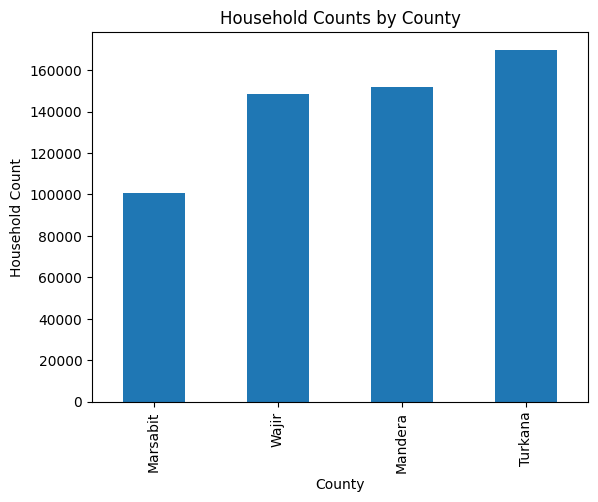

In [12]:
# Group the DataFrame by county and count the number of households in each county
county_counts = df.groupby('county_name')['household_id'].count()

# Sort the county counts in ascending order
county_counts = county_counts.sort_values()

# Plot a bar chart of the county counts
county_counts.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Household Counts by County')
plt.xlabel('County')
plt.ylabel('Household Count')

# Show the chart
plt.show()

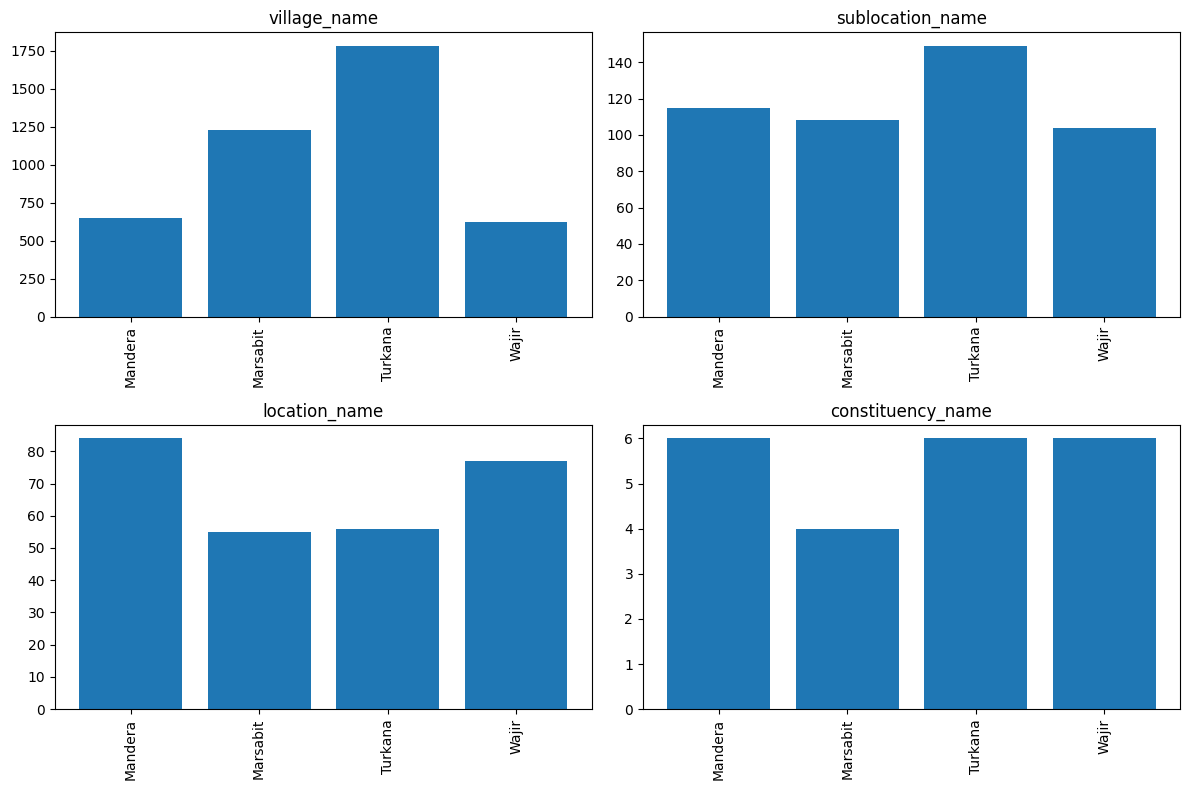

In [13]:
# Group the DataFrame by county and count the unique values of Village_Name, Sublocation_Name, Location_Name, and Constituency_Name
county_counts = df.groupby('county_name').nunique()[['village_name', 'sublocation_name', 'location_name', 'constituency_name']]

# Plot four bar graphs, one for each column
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(county_counts.columns):
    ax = axes[i]
    ax.bar(county_counts.index, county_counts[col])
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### 1) Marsabit County

In [14]:
# Create a map of Marsabit
marsabit_map = folium.Map(location=[2.96776, 37.98612], zoom_start=5)

# Add a marker for Marsabit town
marsabit_marker = folium.Marker(location=[2.96776, 37.98612], popup='Marsabit')
marsabit_marker.add_to(marsabit_map)

# Show the map
marsabit_map

In [15]:
# Filter out Marsabit in dataframe
mar = df[df['county_name'] == "Marsabit"]

In [16]:
# data info
mar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100538 entries, 1 to 100538
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   household_id       100538 non-null  object        
 1   village_id         100538 non-null  int64         
 2   village_name       100538 non-null  object        
 3   sublocation_name   100538 non-null  object        
 4   sublocation_id     100538 non-null  int64         
 5   location_id        100538 non-null  int64         
 6   location_name      100538 non-null  object        
 7   constituency_name  100538 non-null  object        
 8   county_name        100538 non-null  object        
 9   isbeneficiaryhh    100538 non-null  bool          
 10  latitude           100538 non-null  float64       
 11  longitude          100538 non-null  float64       
 12  ruralurban         94807 non-null   object        
 13  constituency_id    100538 non-null  int64   

In [17]:
mar.head()

,household_id,village_id,village_name,sublocation_name,sublocation_id,location_id,location_name,constituency_name,county_name,isbeneficiaryhh,latitude,longitude,ruralurban,constituency_id,entry_date,usercode,county_id
1,4010101010072345100212,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,True,2.33374,37.992490,Urban,47,2018-07-02 09:05:00,0212,10
2,4010101010072345100213,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.33319,37.992270,Urban,47,2018-06-08 19:57:00,0213,10
3,401010101007234510126,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.33148,37.994250,Urban,47,2018-02-10 13:17:00,0126,10
4,401010101007234510128,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.67537,37.876865,Urban,47,2019-07-20 06:57:00,0128,10
5,401010101007234510133,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.30000,37.200000,Urban,47,2019-07-15 14:04:00,0133,10


In [18]:
# shape of dataframe
mar.shape

(100538, 17)

In [19]:
# checkout missing values
mar.isna().any()

household_id         False
village_id           False
village_name         False
sublocation_name     False
sublocation_id       False
location_id          False
location_name        False
constituency_name    False
county_name          False
isbeneficiaryhh      False
latitude             False
longitude            False
ruralurban            True
constituency_id      False
entry_date           False
usercode             False
county_id            False
dtype: bool

In [20]:
# check for duplicates
mar['usercode'].duplicated().sum()

100472

In [21]:
categorical_columns = ["household_id", "village_name", "sublocation_name", "location_name", "constituency_name", "county_name"]

for column in categorical_columns:
    mar[column] = mar[column].str.strip()


c:\Users\USER\Desktop\HSNP\HSNP\env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
mar.head()

,household_id,village_id,village_name,sublocation_name,sublocation_id,location_id,location_name,constituency_name,county_name,isbeneficiaryhh,latitude,longitude,ruralurban,constituency_id,entry_date,usercode,county_id
1,4010101010072345100212,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,True,2.33374,37.992490,Urban,47,2018-07-02 09:05:00,0212,10
2,4010101010072345100213,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.33319,37.992270,Urban,47,2018-06-08 19:57:00,0213,10
3,401010101007234510126,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.33148,37.994250,Urban,47,2018-02-10 13:17:00,0126,10
4,401010101007234510128,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.67537,37.876865,Urban,47,2019-07-20 06:57:00,0128,10
5,401010101007234510133,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.30000,37.200000,Urban,47,2019-07-15 14:04:00,0133,10


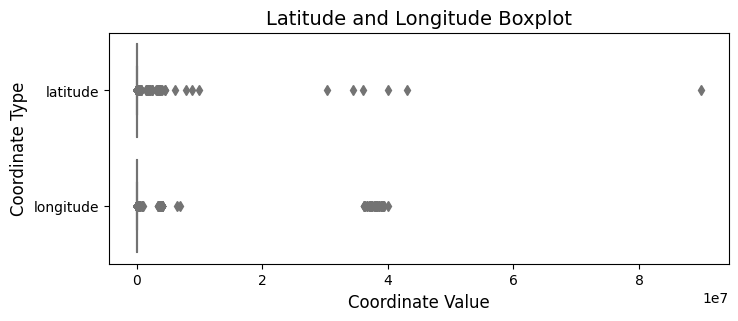

In [23]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 3))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mar[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [24]:
# If latitude is greater than longitude they interchange
mask = mar['latitude'] > mar['longitude']
mar.loc[mask, ['latitude', 'longitude']] = mar.loc[mask, ['longitude', 'latitude']].values


c:\Users\USER\Desktop\HSNP\HSNP\env\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


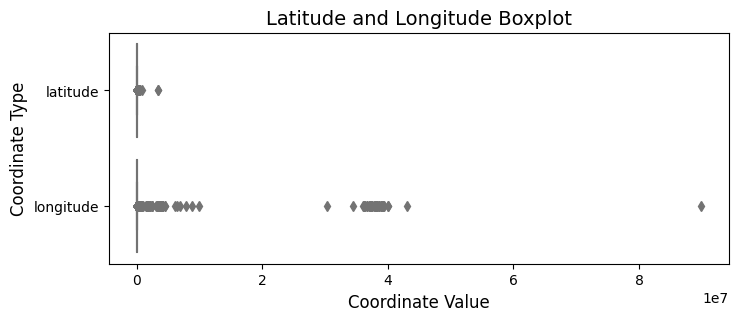

In [25]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 3))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mar[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [26]:
# print the minimum and maximum latitude in the df
print("Min lat = ",mar['latitude'].min(), "Max lat = ",mar['latitude'].max())

Min lat =  0.0 Max lat =  3333333.0


In [27]:
# print the maximum and maximum longitude in the df
print("Min long = ",mar['longitude'].min(), "Max long = ",mar['longitude'].max())

Min long =  0.0 Max long =  89823455.0


In [28]:
# calculate the correction factor for each value
factors = mar['latitude'].apply(lambda x: 10 ** -(len(str(int(x))) - 1))

# divide each value by its correction factor
mar['latitude'] = mar['latitude'] * factors



c:\Users\USER\Desktop\HSNP\HSNP\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
# print the maximum and maximum latitude in the df
print("Min lat = ",mar['latitude'].min(), "Max lat = ",mar['latitude'].max())

Min lat =  0.0 Max lat =  9.9


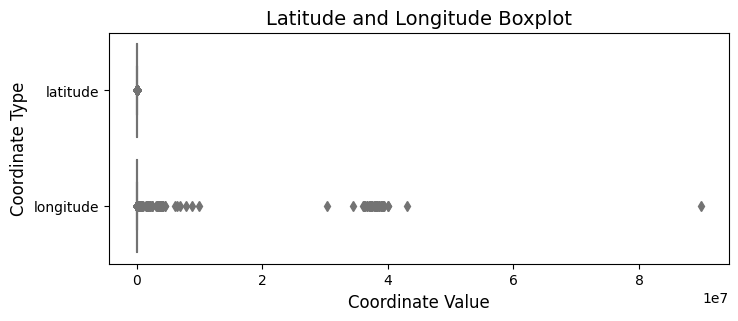

In [30]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 3))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mar[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [31]:
# calculate the correction factor for each value
factors = mar['longitude'].apply(lambda x: 10 ** -(len(str(int(x))) - 2))

# divide each value by its correction factor
mar['longitude'] = mar['longitude'] * factors


c:\Users\USER\Desktop\HSNP\HSNP\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
# print the maximum and maximum longitude in the df
print("Min long = ",mar['longitude'].min(), "Max long = ",mar['longitude'].max())

Min long =  0.0 Max long =  99.999


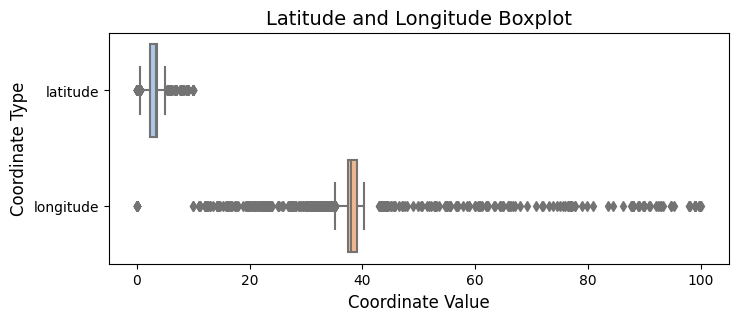

In [33]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 3))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mar[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [34]:
mar.head()

,household_id,village_id,village_name,sublocation_name,sublocation_id,location_id,location_name,constituency_name,county_name,isbeneficiaryhh,latitude,longitude,ruralurban,constituency_id,entry_date,usercode,county_id
1,4010101010072345100212,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,True,2.33374,37.992490,Urban,47,2018-07-02 09:05:00,0212,10
2,4010101010072345100213,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.33319,37.992270,Urban,47,2018-06-08 19:57:00,0213,10
3,401010101007234510126,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.33148,37.994250,Urban,47,2018-02-10 13:17:00,0126,10
4,401010101007234510128,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.67537,37.876865,Urban,47,2019-07-20 06:57:00,0128,10
5,401010101007234510133,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.30000,37.200000,Urban,47,2019-07-15 14:04:00,0133,10


In [35]:
# Read mar as marsabit
marsabit = mar

# Read the Marsabit boundary shapefile into a GeoDataFrame
marsabit_boundary = gpd.read_file('Shapefiles\Marsabit.shp')  

# Function to check if a coordinate is in Marsabit
def is_coordinate_in_marsabit(latitude, longitude):
    point = Point(longitude, latitude)
    return marsabit_boundary.contains(point).any()

# Iterate through the dataframe rows and update coordinates if necessary
for index, row in marsabit.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    
    if not is_coordinate_in_marsabit(latitude, longitude):
        # Assign random coordinates within Marsabit
        while True:
            # Set the latitude range to cover the approximate area of Marsabit
            random_latitude = random.uniform(marsabit_boundary.bounds['miny'], marsabit_boundary.bounds['maxy'])
            # Set the longitude range to cover the approximate area of Marsabit
            random_longitude = random.uniform(marsabit_boundary.bounds['minx'], marsabit_boundary.bounds['maxx']) 
            
            if is_coordinate_in_marsabit(random_latitude, random_longitude):
                # Found a random coordinate within Marsabit, update the dataframe
                marsabit.at[index, 'latitude'] = random_latitude
                marsabit.at[index, 'longitude'] = random_longitude
                break

ValueError: Point() takes only scalar or 1-size vector arguments, got (0       3.754532e+01
1       3.793235e+01
2       3.854536e+01
3       3.854378e+06
4       3.783767e+01
            ...     
5904    3.722520e+01
5905    3.673323e+01
5906    3.802121e+01
5907    3.699443e+01
5908    3.692232e+01
Length: 5909, dtype: float64, 0            2.511535
1            2.361980
2       360930.000000
3            3.610090
4            2.804510
            ...      
5904         3.317193
5905    272341.000000
5906         2.150275
5907         3.590713
5908         3.246912
Length: 5909, dtype: float64)

In [ ]:
# Calculate the mean latitude and longitude
mean_latitude = mar['latitude'].mean()
mean_longitude = mar['longitude'].mean()

In [35]:
mean_latitude

3.006505675082725

In [36]:
mean_longitude

38.10805760671885

In [37]:
# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 10 * mar['latitude'].std()

In [38]:
threshold

7.394863080445737

In [39]:
# Identify outliers based on the threshold
outliers = ((mar['latitude'] - mean_latitude).abs() > threshold) | ((mar['longitude'] - mean_longitude).abs() > threshold)


In [40]:
# Replace outliers with random values around the mean
mar.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=mar['latitude'].std(), size=outliers.sum())
mar.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=mar['longitude'].std(), size=outliers.sum())


In [41]:
mar.head()

,household_id,village_id,village_name,sublocation_name,sublocation_id,location_id,location_name,constituency_name,county_name,isbeneficiaryhh,latitude,longitude,ruralurban,constituency_id,entry_date,usercode,county_id
1,4010101010072345100212,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,True,2.33374,37.992490,Urban,47,2018-07-02 09:05:00,0212,10
2,4010101010072345100213,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.33319,37.992270,Urban,47,2018-06-08 19:57:00,0213,10
3,401010101007234510126,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.33148,37.994250,Urban,47,2018-02-10 13:17:00,0126,10
4,401010101007234510128,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.67537,37.876865,Urban,47,2019-07-20 06:57:00,0128,10
5,401010101007234510133,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.30000,37.200000,Urban,47,2019-07-15 14:04:00,0133,10


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


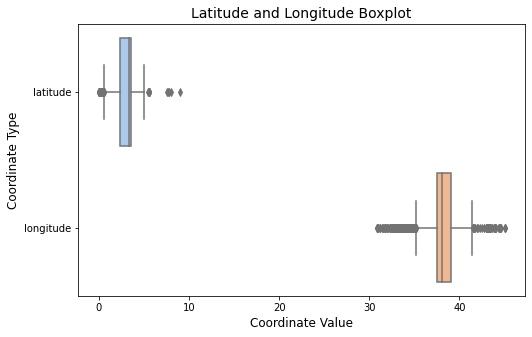

In [42]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mar[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [43]:
# Calculate the mean latitude and longitude
mean_latitude = mar['latitude'].mean()
mean_longitude = mar['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * mar['latitude'].std()

# Identify outliers based on the threshold
outliers = ((mar['latitude'] - mean_latitude).abs() > threshold) | ((mar['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
mar.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=mar['latitude'].std(), size=outliers.sum())
mar.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=mar['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


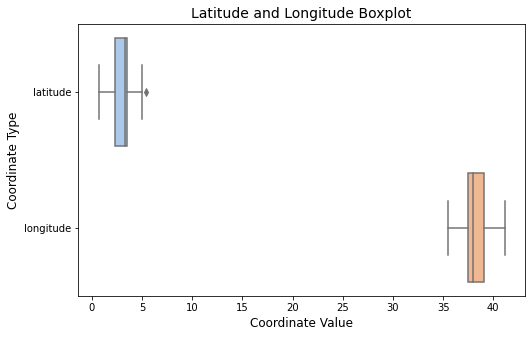

In [44]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mar[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [45]:
# Calculate the mean latitude and longitude
mean_latitude = mar['latitude'].mean()
mean_longitude = mar['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * mar['latitude'].std()

# Identify outliers based on the threshold
outliers = ((mar['latitude'] - mean_latitude).abs() > threshold) | ((mar['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
mar.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=mar['latitude'].std(), size=outliers.sum())
mar.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=mar['longitude'].std(), size=outliers.sum())


In [46]:
# Calculate the mean latitude and longitude
mean_latitude = mar['latitude'].mean()
mean_longitude = mar['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * mar['latitude'].std()

# Identify outliers based on the threshold
outliers = ((mar['latitude'] - mean_latitude).abs() > threshold) | ((mar['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
mar.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=mar['latitude'].std(), size=outliers.sum())
mar.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=mar['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


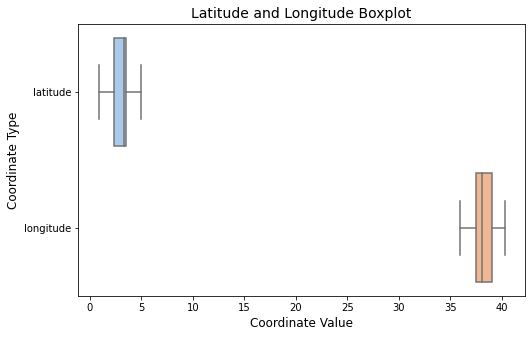

In [47]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mar[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [48]:
# Read the Marsabit boundary shapefile into a GeoDataFrame
marsabit_boundary = gpd.read_file('Shapefiles/Marsabit_County.shp')  # Replace 'marsabit_boundary.shp' with the actual path to your Marsabit boundary shapefile


In [49]:
# Function to check if a coordinate is in Marsabit
def is_coordinate_in_marsabit(latitude, longitude):
    point = Point(longitude, latitude)
    return marsabit_boundary.contains(point).any()

# Iterate through the dataframe rows and update coordinates if necessary
for index, row in mar.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    
    if not is_coordinate_in_marsabit(latitude, longitude):
        # Assign random coordinates within Marsabit
        while True:
            random_latitude = random.uniform(2.2769, 4.6429)  # Set the latitude range to cover the approximate area of Marsabit
            random_longitude = random.uniform(36.4842, 40.9980 )  # Set the longitude range to cover the approximate area of Marsabit
            
            if is_coordinate_in_marsabit(random_latitude, random_longitude):
                # Found a random coordinate within Marsabit, update the dataframe
                mar.at[index, 'latitude'] = random_latitude
                mar.at[index, 'longitude'] = random_longitude
                break

In [ ]:
# # #  save dataset
mar.to_csv('marsabit.csv', index=False)

### *2) Wajir*

In [76]:
# Create a map of Marsabit
wajir_map = folium.Map(location=[1.7470, 40.0682], zoom_start=10)

# Add a marker for Marsabit town
wajir_marker = folium.Marker(location=[1.7470, 40.0682], popup='Wajir')
wajir_marker.add_to(wajir_map)

# Show the map
wajir_map

In [77]:
# Filter out Marsabit in dataframe
wajir = df[df['county_name'] == "Wajir"]

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


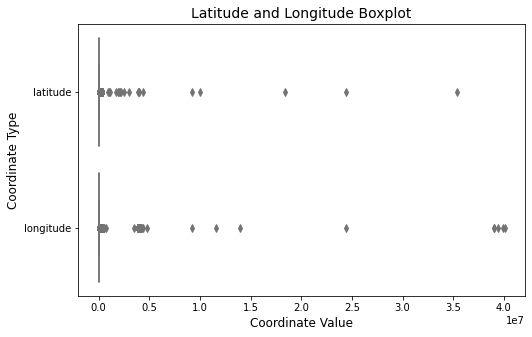

In [78]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [79]:
# If latitude is greater than longitude they interchange
mask = wajir['latitude'] > wajir['longitude']
wajir.loc[mask, ['latitude', 'longitude']] = wajir.loc[mask, ['longitude', 'latitude']].values


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


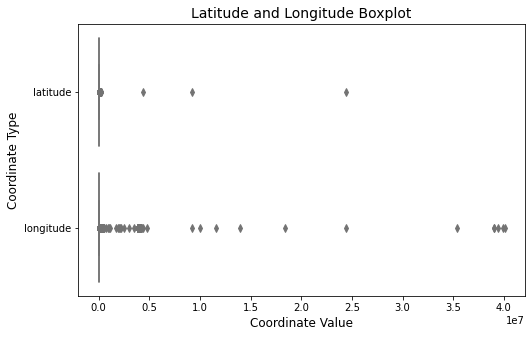

In [80]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [81]:
# calculate the correction factor for each value
factors = wajir['latitude'].apply(lambda x: 10 ** -(len(str(int(x))) - 1))

# divide each value by its correction factor
wajir['latitude'] = wajir['latitude'] * factors

# # print the corrected dataframe
# print(df_sample)

<ipython-input-81-0be54d746f88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wajir['latitude'] = wajir['latitude'] * factors


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


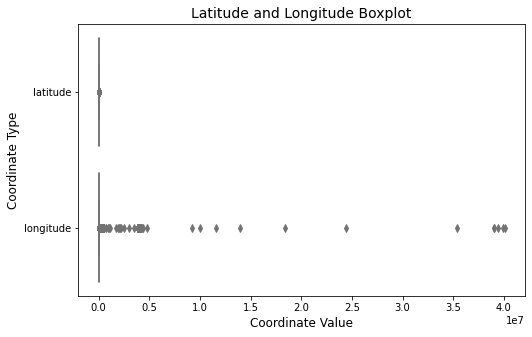

In [82]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [83]:
# calculate the correction factor for each value
factors = wajir['longitude'].apply(lambda x: 10 ** -(len(str(int(x))) - 2))

# divide each value by its correction factor
wajir['longitude'] = wajir['longitude'] * factors


<ipython-input-83-b91090bf27e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wajir['longitude'] = wajir['longitude'] * factors


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


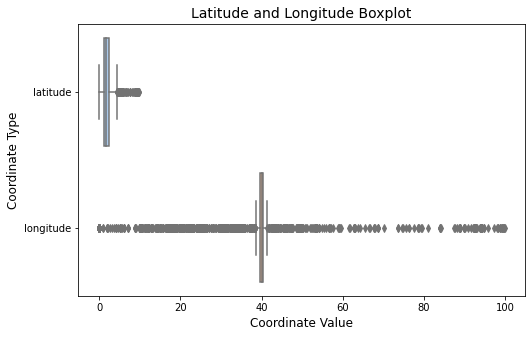

In [84]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [85]:
# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 10 * wajir['latitude'].std()

In [86]:
# Identify outliers based on the threshold
outliers = ((wajir['latitude'] - mean_latitude).abs() > threshold) | ((wajir['longitude'] - mean_longitude).abs() > threshold)


In [87]:
# Replace outliers with random values around the mean
wajir.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=wajir['latitude'].std(), size=outliers.sum())
wajir.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=wajir['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


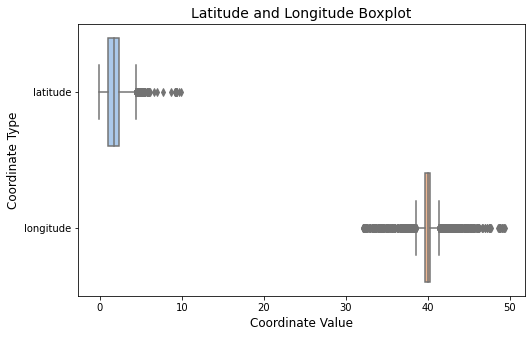

In [88]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [89]:
# Calculate the mean latitude and longitude
mean_latitude = wajir['latitude'].mean()
mean_longitude = wajir['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * wajir['latitude'].std()

# Identify outliers based on the threshold
outliers = ((wajir['latitude'] - mean_latitude).abs() > threshold) | ((wajir['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
wajir.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=wajir['latitude'].std(), size=outliers.sum())
wajir.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=wajir['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


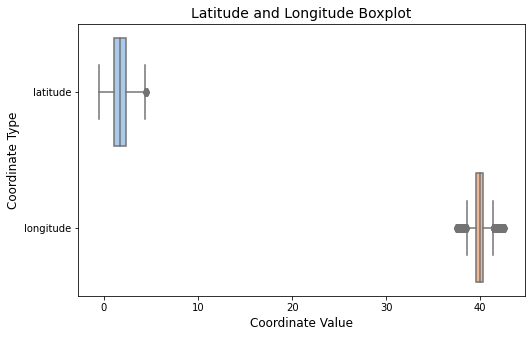

In [90]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [91]:
# Calculate the mean latitude and longitude
mean_latitude = wajir['latitude'].mean()
mean_longitude = wajir['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * wajir['latitude'].std()

# Identify outliers based on the threshold
outliers = ((wajir['latitude'] - mean_latitude).abs() > threshold) | ((wajir['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
wajir.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=wajir['latitude'].std(), size=outliers.sum())
wajir.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=wajir['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


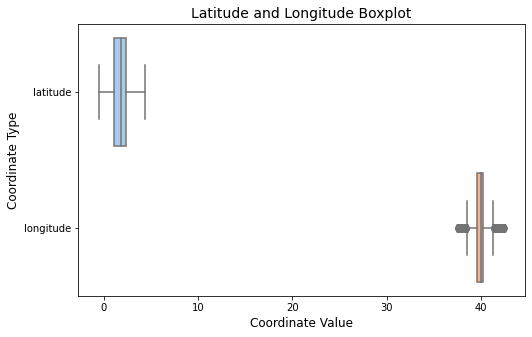

In [92]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [93]:
# Calculate the mean latitude and longitude
mean_latitude = wajir['latitude'].mean()
mean_longitude = wajir['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * wajir['latitude'].std()

# Identify outliers based on the threshold
outliers = ((wajir['latitude'] - mean_latitude).abs() > threshold) | ((wajir['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
wajir.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=wajir['latitude'].std(), size=outliers.sum())
wajir.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=wajir['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


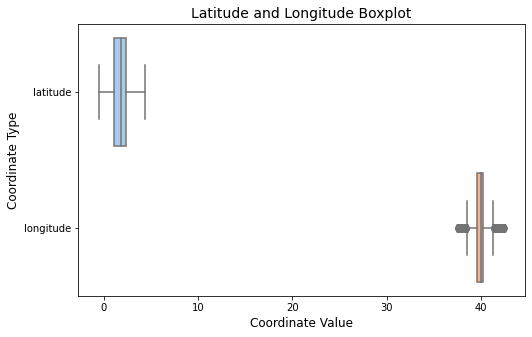

In [94]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [95]:
# Calculate the mean latitude and longitude
mean_latitude = wajir['latitude'].mean()
mean_longitude = wajir['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * wajir['latitude'].std()

# Identify outliers based on the threshold
outliers = ((wajir['latitude'] - mean_latitude).abs() > threshold) | ((wajir['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
wajir.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=wajir['latitude'].std(), size=outliers.sum())
wajir.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=wajir['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


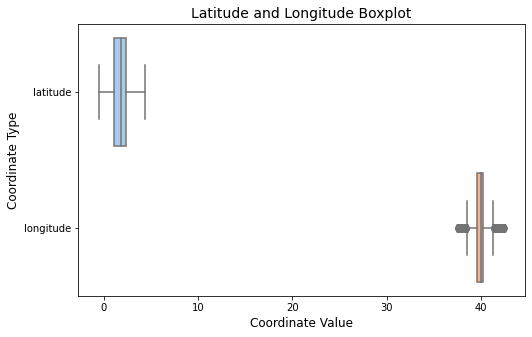

In [96]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [97]:
# Calculate the mean latitude and longitude
mean_latitude = wajir['latitude'].mean()
mean_longitude = wajir['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold =3 * wajir['latitude'].std()

# Identify outliers based on the threshold
outliers = ((wajir['latitude'] - mean_latitude).abs() > threshold) | ((wajir['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
wajir.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=wajir['latitude'].std(), size=outliers.sum())
wajir.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=wajir['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


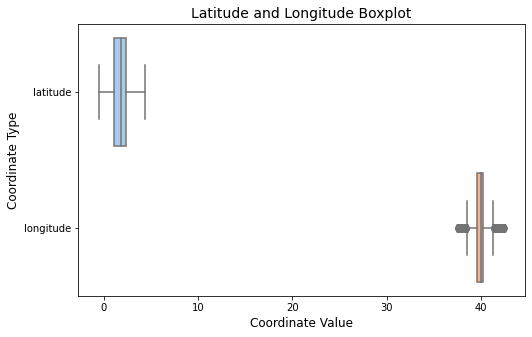

In [98]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [99]:
# Calculate the mean latitude and longitude
mean_latitude = wajir['latitude'].mean()
mean_longitude = wajir['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * wajir['latitude'].std()

# Identify outliers based on the threshold
outliers = ((wajir['latitude'] - mean_latitude).abs() > threshold) | ((wajir['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
wajir.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=wajir['latitude'].std(), size=outliers.sum())
wajir.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=wajir['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


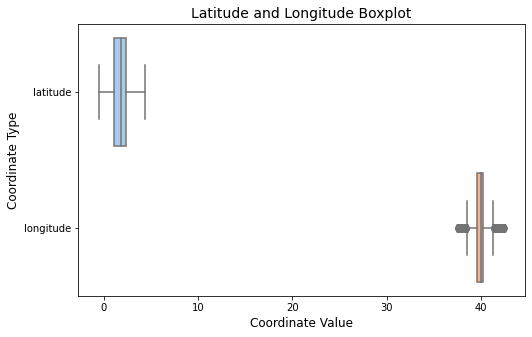

In [100]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [101]:
# Calculate the mean latitude and longitude
mean_latitude = wajir['latitude'].mean()
mean_longitude = wajir['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * wajir['latitude'].std()

# Identify outliers based on the threshold
outliers = ((wajir['latitude'] - mean_latitude).abs() > threshold) | ((wajir['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
wajir.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=wajir['latitude'].std(), size=outliers.sum())
wajir.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=wajir['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


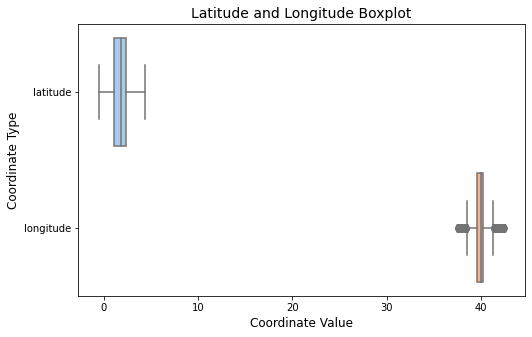

In [102]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [103]:
# Calculate the mean latitude and longitude
mean_latitude = wajir['latitude'].mean()
mean_longitude = wajir['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * wajir['latitude'].std()

# Identify outliers based on the threshold
outliers = ((wajir['latitude'] - mean_latitude).abs() > threshold) | ((wajir['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
wajir.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=wajir['latitude'].std(), size=outliers.sum())
wajir.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=wajir['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


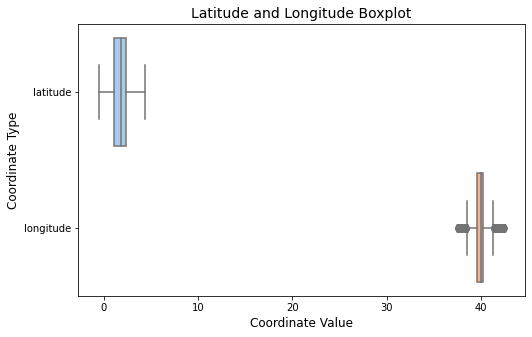

In [104]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [105]:
# Calculate the mean latitude and longitude
mean_latitude = wajir['latitude'].mean()
mean_longitude = wajir['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * wajir['latitude'].std()

# Identify outliers based on the threshold
outliers = ((wajir['latitude'] - mean_latitude).abs() > threshold) | ((wajir['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
wajir.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=wajir['latitude'].std(), size=outliers.sum())
wajir.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=wajir['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


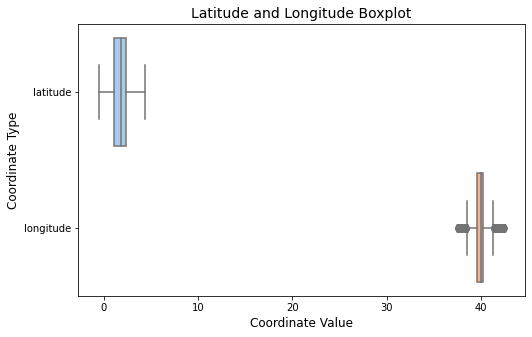

In [106]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=wajir[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()


In [107]:
# Read the Wajir boundary shapefile into a GeoDataFrame
wajir_boundary = gpd.read_file('Shapefiles/Wajir_County.shp')  # Replace 'wajir_boundary.shp' with the actual path to your Wajir boundary shapefile


In [108]:
# Function to check if a coordinate is in Wajir
def is_coordinate_in_wajir(latitude, longitude):
    point = Point(longitude, latitude)
    return wajir_boundary.contains(point).any()

# Iterate through the dataframe rows and update coordinates if necessary
for index, row in wajir.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    
    if not is_coordinate_in_wajir(latitude, longitude):
        # Assign random coordinates within Wajir
        while True:
            random_latitude = random.uniform(wajir_boundary.bounds['miny'], wajir_boundary.bounds['maxy'])
            random_longitude = random.uniform(wajir_boundary.bounds['minx'], wajir_boundary.bounds['maxx'])
            
            if is_coordinate_in_wajir(random_latitude, random_longitude):
                # Found a random coordinate within Wajir, update the dataframe
                wajir.at[index, 'latitude'] = random_latitude
                wajir.at[index, 'longitude'] = random_longitude
                break

In [109]:
## save dataset
wajir.to_csv('wajir.csv', index=False)

### *3) Mandera*

In [110]:
# Create a map of Mandera
mandera_map = folium.Map(location=[3.4421, 40.9382], zoom_start=10)

# Add a marker for Marsabit town
mandera_marker = folium.Marker(location=[3.4421, 40.9382], popup='Mandera')
mandera_marker.add_to(mandera_map)

# Show the map
mandera_map

In [111]:
# Filter out Marsabit in dataframe
mandera = df[df['county_name'] == "Mandera"]

In [112]:
mandera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151606 entries, 0 to 400783
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   household_id       151606 non-null  object        
 1   village_id         151606 non-null  int64         
 2   village_name       151606 non-null  object        
 3   sublocation_name   151606 non-null  object        
 4   sublocation_id     151606 non-null  int64         
 5   location_id        151606 non-null  int64         
 6   location_name      151606 non-null  object        
 7   constituency_name  151606 non-null  object        
 8   county_name        151606 non-null  object        
 9   isbeneficiaryhh    151606 non-null  bool          
 10  latitude           151606 non-null  float64       
 11  longitude          151606 non-null  float64       
 12  ruralurban         139321 non-null  object        
 13  constituency_id    151606 non-null  int64   

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


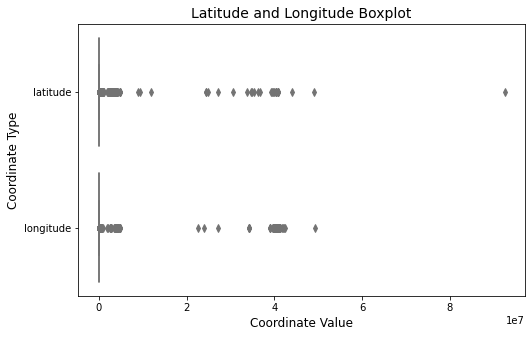

In [113]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mandera[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [114]:
# If latitude is greater than longitude they interchange
mask = mandera['latitude'] > mandera['longitude']
mandera.loc[mask, ['latitude', 'longitude']] = mandera.loc[mask, ['longitude', 'latitude']].values


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


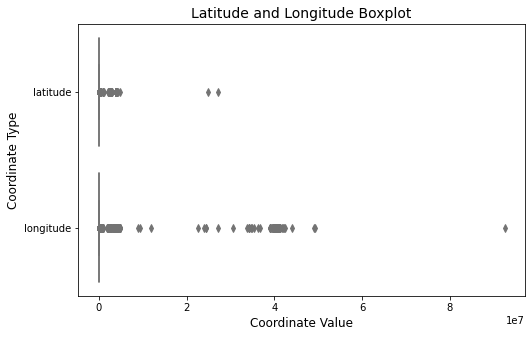

In [115]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mandera[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [116]:
# calculate the correction factor for each value
factors = mandera['latitude'].apply(lambda x: 10 ** -(len(str(int(x))) - 1))

# divide each value by its correction factor
mandera['latitude'] = mandera['latitude'] * factors

# # print the corrected dataframe
# print(df_sample)

<ipython-input-116-92c563b375b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mandera['latitude'] = mandera['latitude'] * factors


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


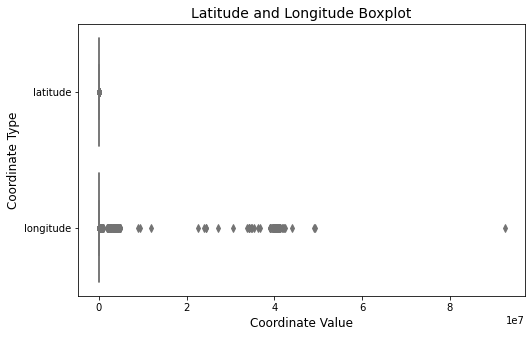

In [117]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mandera[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [118]:
# calculate the correction factor for each value
factors = mandera['longitude'].apply(lambda x: 10 ** -(len(str(int(x))) - 2))

# divide each value by its correction factor
mandera['longitude'] = mandera['longitude'] * factors

<ipython-input-118-9ee05d1aeb9e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mandera['longitude'] = mandera['longitude'] * factors


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


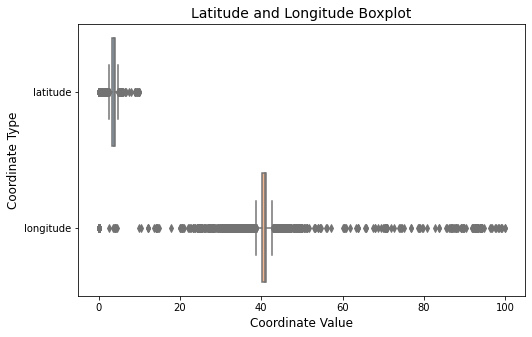

In [119]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mandera[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [120]:
# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 10 * mandera['latitude'].std()

# Identify outliers based on the threshold
outliers = ((mandera['latitude'] - mean_latitude).abs() > threshold) | ((mandera['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
mandera.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=mandera['latitude'].std(), size=outliers.sum())
mandera.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=mandera['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


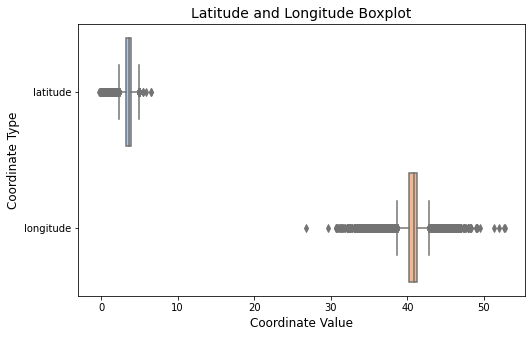

In [121]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mandera[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [122]:
# Calculate the mean latitude and longitude
mean_latitude = mandera['latitude'].mean()
mean_longitude = mandera['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * mandera['latitude'].std()

# Identify outliers based on the threshold
outliers = ((mandera['latitude'] - mean_latitude).abs() > threshold) | ((mandera['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
mandera.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=mandera['latitude'].std(), size=outliers.sum())
mandera.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=mandera['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


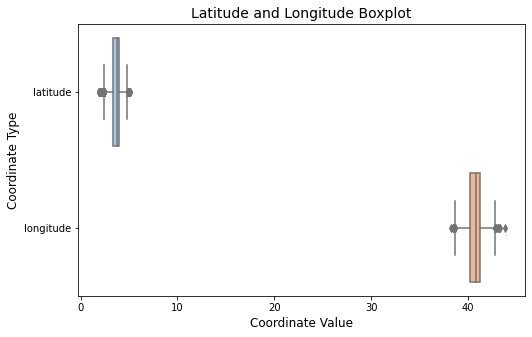

In [123]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mandera[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [124]:
# Calculate the mean latitude and longitude
mean_latitude = mandera['latitude'].mean()
mean_longitude = mandera['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * mandera['latitude'].std()

# Identify outliers based on the threshold
outliers = ((mandera['latitude'] - mean_latitude).abs() > threshold) | ((mandera['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
mandera.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=mandera['latitude'].std(), size=outliers.sum())
mandera.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=mandera['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


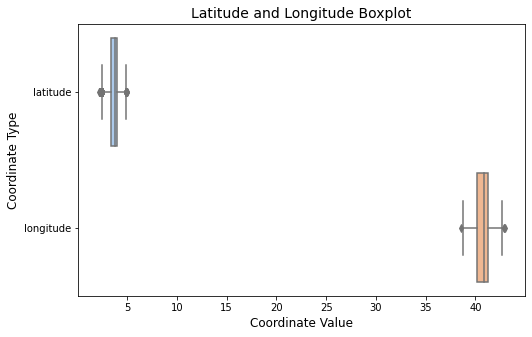

In [125]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mandera[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [127]:
# Calculate the mean latitude and longitude
mean_latitude = mandera['latitude'].mean()
mean_longitude = mandera['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * mandera['latitude'].std()

# Identify outliers based on the threshold
outliers = ((mandera['latitude'] - mean_latitude).abs() > threshold) | ((mandera['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
mandera.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=mandera['latitude'].std(), size=outliers.sum())
mandera.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=mandera['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


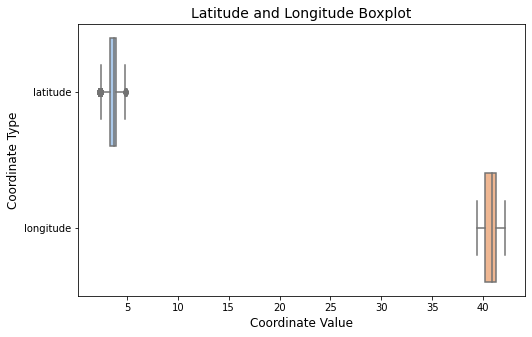

In [128]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mandera[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [129]:
# Calculate the mean latitude and longitude
mean_latitude = mandera['latitude'].mean()
mean_longitude = mandera['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * mandera['latitude'].std()

# Identify outliers based on the threshold
outliers = ((mandera['latitude'] - mean_latitude).abs() > threshold) | ((mandera['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
mandera.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=mandera['latitude'].std(), size=outliers.sum())
mandera.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=mandera['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


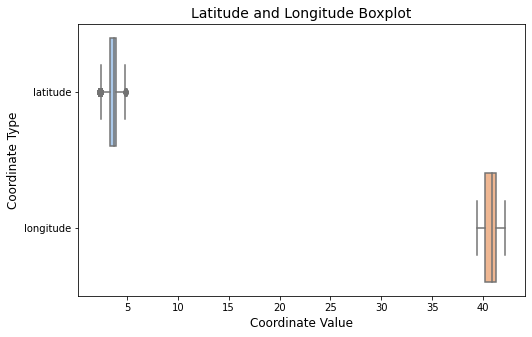

In [130]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mandera[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [131]:
# Calculate the mean latitude and longitude
mean_latitude = mandera['latitude'].mean()
mean_longitude = mandera['longitude'].mean()

# Define a threshold for considering outliers (e.g., 3 standard deviations)
threshold = 3 * mandera['latitude'].std()

# Identify outliers based on the threshold
outliers = ((mandera['latitude'] - mean_latitude).abs() > threshold) | ((mandera['longitude'] - mean_longitude).abs() > threshold)

# Replace outliers with random values around the mean
mandera.loc[outliers, 'latitude'] = np.random.normal(loc=mean_latitude, scale=mandera['latitude'].std(), size=outliers.sum())
mandera.loc[outliers, 'longitude'] = np.random.normal(loc=mean_longitude, scale=mandera['longitude'].std(), size=outliers.sum())


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


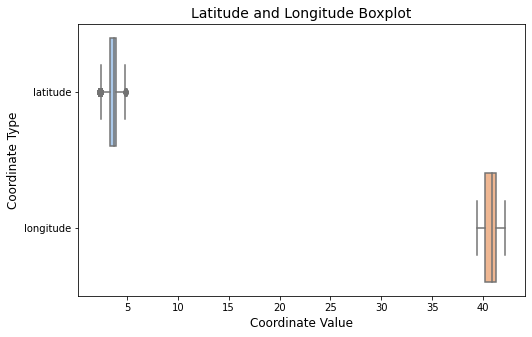

In [132]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=mandera[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [133]:
# Read the Mandera boundary shapefile into a GeoDataFrame
mandera_boundary = gpd.read_file('Shapefiles/Mandera_County.shp')  # Replace 'mandera_boundary.shp' with the actual path to your Mandera boundary shapefile


In [ ]:
# Read the Mandera boundary shapefile into a GeoDataFrame
mandera_boundary = gpd.read_file('Shapefiles/Mandera_County.shp')  # Replace 'mandera_boundary.shp' with the actual path to your Mandera boundary shapefile

# Function to check if a coordinate is in Marsabit
def is_coordinate_in_mandera(latitude, longitude):
    point = Point(longitude, latitude)
    return mandera_boundary.contains(point).any()

# Iterate through the dataframe rows and update coordinates if necessary
for index, row in mandera.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    
    if not is_coordinate_in_mandera(latitude, longitude):
        # Assign random coordinates within Mandera
        while True:
            # Set the latitude range to cover the approximate area of Mandera
            random_latitude = random.uniform(mandera_boundary.bounds['miny'], mandera_boundary.bounds['maxy'])  
            # Set the longitude range to cover the approximate area of Mandera 
            random_longitude = random.uniform(mandera_boundary.bounds['minx'], mandera_boundary.bounds['maxx'])
              
            
            if is_coordinate_in_mandera(random_latitude, random_longitude):
                # Found a random coordinate within Mandera, update the dataframe
                mandera.at[index, 'latitude'] = random_latitude
                mandera.at[index, 'longitude'] = random_longitude
                break
				


In [134]:
# Function to check if a coordinate is in Marsabit
def is_coordinate_in_mandera(latitude, longitude):
    point = Point(longitude, latitude)
    return mandera_boundary.contains(point).any()

# Iterate through the dataframe rows and update coordinates if necessary
for index, row in mandera.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    
    if not is_coordinate_in_mandera(latitude, longitude):
        # Assign random coordinates within Mandera
        while True:
            # Set the latitude range to cover the approximate area of Mandera
            random_latitude = random.uniform(mandera_boundary.bounds['miny'], mandera_boundary.bounds['maxy'])  
            # Set the longitude range to cover the approximate area of Mandera 
            random_longitude = random.uniform(mandera_boundary.bounds['minx'], mandera_boundary.bounds['maxx'])
              
            
            if is_coordinate_in_mandera(random_latitude, random_longitude):
                # Found a random coordinate within Mandera, update the dataframe
                mandera.at[index, 'latitude'] = random_latitude
                mandera.at[index, 'longitude'] = random_longitude
                break
				

In [135]:
## save dataset
mandera.to_csv('mandera.csv', index=False)

### *4) Turkana*

In [37]:
# Create a map of Turkana
turkana_map = folium.Map(location=[3.1190, 35.6059], zoom_start=10)

# Add a marker for Turkana town
turkana_marker = folium.Marker(location=[3.1190, 35.6059], popup='Turkana')
turkana_marker.add_to(turkana_map)

# Show the map
turkana_map


In [38]:
# Filter out Marsabit in dataframe
turkana = df[df['county_name'] == "Turkana"]

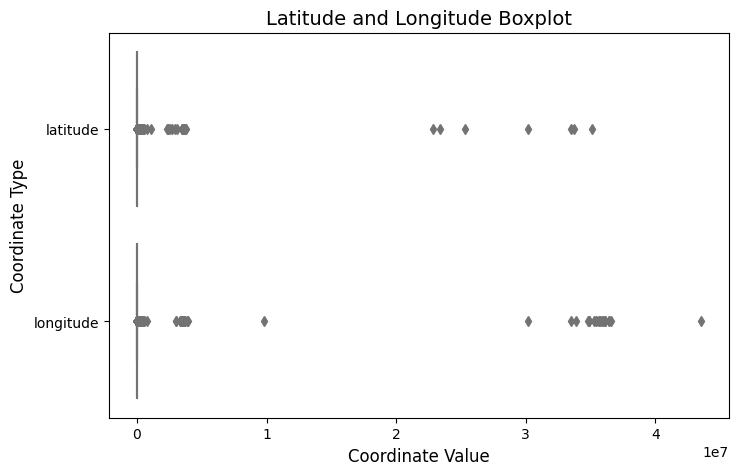

In [39]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=turkana[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [40]:
# If latitude is greater than longitude they interchange
mask = turkana['latitude'] > turkana['longitude']
turkana.loc[mask, ['latitude', 'longitude']] = turkana.loc[mask, ['longitude', 'latitude']].values


c:\Users\USER\Desktop\HSNP\HSNP\env\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


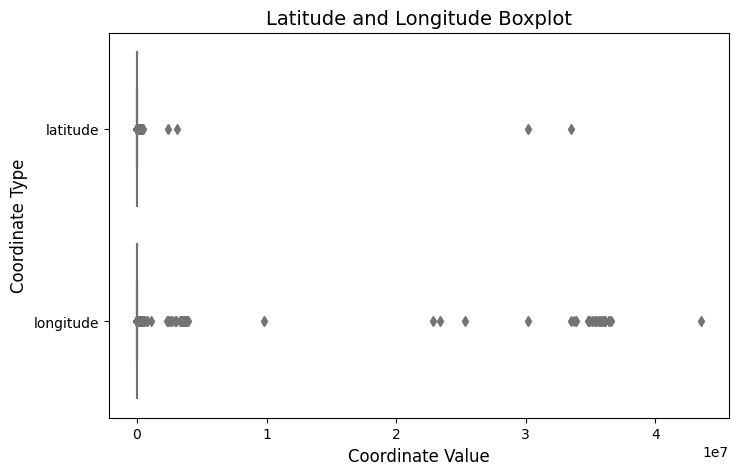

In [41]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=turkana[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [42]:
# calculate the correction factor for each value
factors = turkana['latitude'].apply(lambda x: 10 ** -(len(str(int(x))) - 1))

# divide each value by its correction factor
turkana['latitude'] = turkana['latitude'] * factors

# # print the corrected dataframe
# print(df_sample)

c:\Users\USER\Desktop\HSNP\HSNP\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


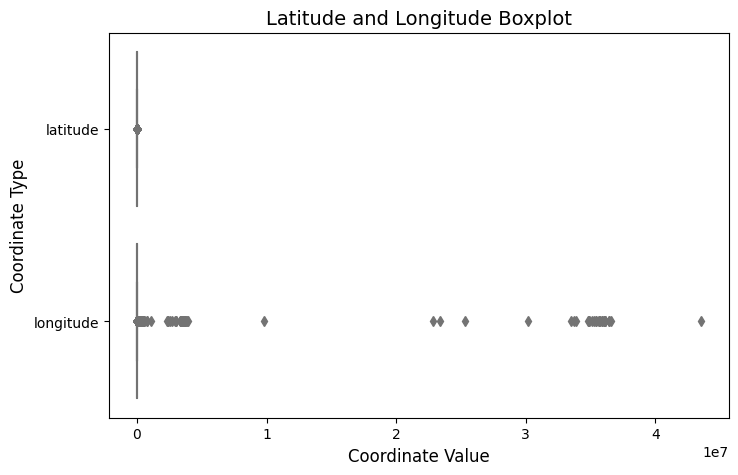

In [43]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=turkana[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [44]:
# calculate the correction factor for each value
factors = turkana['longitude'].apply(lambda x: 10 ** -(len(str(int(x))) - 2))

# divide each value by its correction factor
turkana['longitude'] = turkana['longitude'] * factors


c:\Users\USER\Desktop\HSNP\HSNP\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


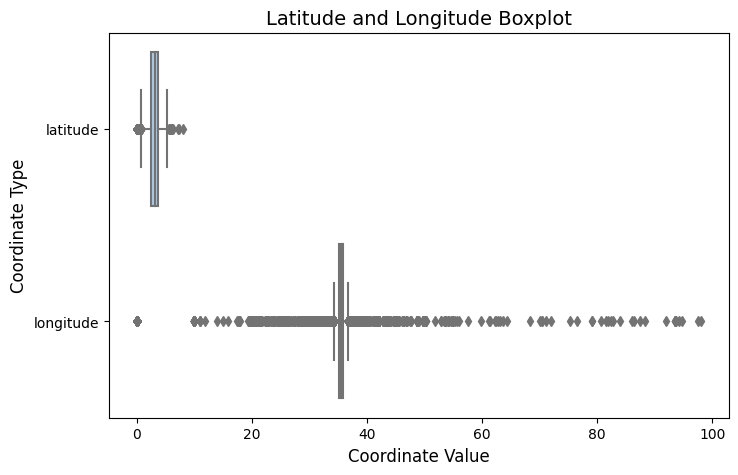

In [45]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=turkana[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [47]:
# Read the Turkana boundary shapefile into a GeoDataFrame
turkana_boundary = gpd.read_file('Shapefiles/Turkana_County.shp')  # Replace 'marsabit_boundary.shp' with the actual path to your Marsabit boundary shapefile

# Function to check if a coordinate is in Marsabit
def is_coordinate_in_turkana(latitude, longitude):
    point = Point(longitude, latitude)
    return turkana_boundary.contains(point).any()

# Iterate through the dataframe rows and update coordinates if necessary
for index, row in turkana.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    
    if not is_coordinate_in_turkana(latitude, longitude):
        # Assign random coordinates within Turkana
        while True:
            # Set the latitude range to cover the approximate area of Turkana
            random_latitude = random.uniform(turkana_boundary.bounds['miny'], turkana_boundary.bounds['maxy'])
            # Set the longitude range to cover the approximate area of Turkana
            random_longitude = random.uniform(turkana_boundary.bounds['minx'], turkana_boundary.bounds['maxx']) 
            
            if is_coordinate_in_turkana(random_latitude, random_longitude):
                # Found a random coordinate within Turkana, update the dataframe
                turkana.at[index, 'latitude'] = random_latitude
                turkana.at[index, 'longitude'] = random_longitude
                break

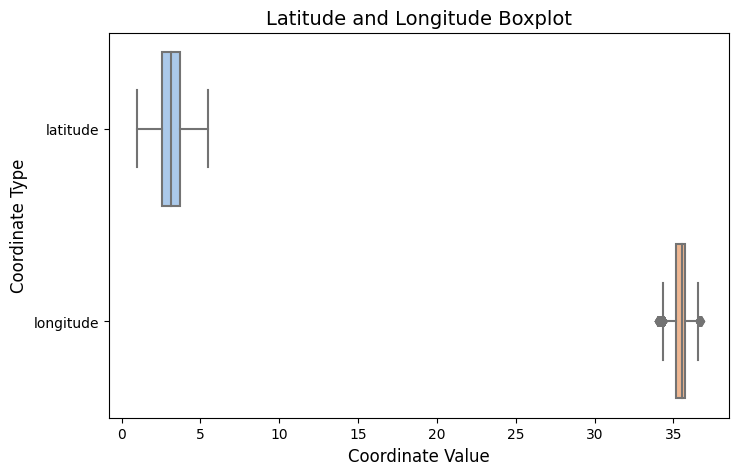

In [48]:
# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot for the latitude and longitude columns
sns.boxplot(data=turkana[['latitude', 'longitude']], orient='h', ax=ax, palette='pastel')

# Set the chart title and axis labels
ax.set_title('Latitude and Longitude Boxplot', fontsize=14)
ax.set_xlabel('Coordinate Value', fontsize=12)
ax.set_ylabel('Coordinate Type', fontsize=12)
ax.tick_params(labelsize=10)

# Show the chart
plt.show()

In [51]:
## save dataset
turkana.to_csv('turkana.csv', index=False)

# Convert dataframe to GeoDataFrame
gdf = gpd.GeoDataFrame(turkana, geometry=gpd.points_from_xy(turkana.longitude, turkana.latitude))

# Save GeoDataFrame to shapefile
output_shapefile_path = 'Shapefiles/turkana_beneficiary.shp'
gdf.to_file(output_shapefile_path)

c:\Users\USER\Desktop\HSNP\HSNP\env\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  if __name__ == "__main__":


DriverSupportError: ESRI Shapefile does not support datetime fields

In [ ]:

# # Concatenate the dataframes along the row axis
# combined_df = pd.concat([mar, mandera, turkana, wajir], ignore_index=True)

# # Reset the index of the combined dataframe
# combined_df.reset_index(drop=True, inplace=True)

In [ ]:
# # Read Excel
# combined_df.head()

,household_id,village_id,village_name,sublocation_name,sublocation_id,location_id,location_name,constituency_name,county_name,isbeneficiaryhh,latitude,longitude,ruralurban,constituency_id,entry_date,usercode,county_id
0,4010101010072345100212,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,True,2.33374,37.992490,Urban,47,2018-07-02 09:05:00,0212,10
1,4010101010072345100213,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.33319,37.992270,Urban,47,2018-06-08 19:57:00,0213,10
2,401010101007234510126,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.33148,37.994250,Urban,47,2018-02-10 13:17:00,0126,10
3,401010101007234510128,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.67537,37.876865,Urban,47,2019-07-20 06:57:00,0128,10
4,401010101007234510133,4010101010072345,Galcha Dida,Nyayo Rd,401010101,4010101,Nagayo,Saku,Marsabit,False,2.30000,37.200000,Urban,47,2019-07-15 14:04:00,0133,10


In [ ]:
# combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570675 entries, 0 to 570674
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   household_id       570675 non-null  object        
 1   village_id         570675 non-null  int64         
 2   village_name       570675 non-null  object        
 3   sublocation_name   570675 non-null  object        
 4   sublocation_id     570675 non-null  int64         
 5   location_id        570675 non-null  int64         
 6   location_name      570675 non-null  object        
 7   constituency_name  570675 non-null  object        
 8   county_name        570675 non-null  object        
 9   isbeneficiaryhh    570675 non-null  bool          
 10  latitude           570675 non-null  float64       
 11  longitude          570675 non-null  float64       
 12  ruralurban         544571 non-null  object        
 13  constituency_id    570675 non-null  int64   

In [ ]:
# # Convert village id to object
# combined_df['village_id'] = combined_df['village_id'].astype(str)a


In [ ]:
# # save to excel
# combined_df.to_excel('combined_data.xlsx', index=False)
